In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from itertools import combinations

import pandas as pd

In [3]:
linear_train_df = pd.read_csv('combined_data/linear_train_data.csv')
linear_val_df = pd.read_csv('combined_data/linear_val_data.csv')
linear_test_df = pd.read_csv('combined_data/linear_test_data.csv')
non_linear_train_df = pd.read_csv('combined_data//non_linear_train_data.csv')
non_linear_val_df = pd.read_csv('combined_data//non_linear_val_data.csv')
non_linear_test_df = pd.read_csv('combined_data//non_linear_test_data.csv')
overlapping_train_df = pd.read_csv('combined_data/overlapping_train_data.csv')
overlapping_val_df = pd.read_csv('combined_data/overlapping_val_data.csv')
overlapping_test_df = pd.read_csv('combined_data/overlapping_test_data.csv')

In [50]:
def classwise_covariance_matrix(data, labels, average_type='1'):
    
    unique_labels = np.unique(labels)
    num_features = data.shape[1]
    class_variances = []

    for label in unique_labels:
        class_data = data[labels == label]
        class_variance = np.var(class_data, axis=0)
        class_variances.append(class_variance)

    avg_cov_matrix = np.mean(class_variances, axis=0)   
    print(np.mean(avg_cov_matrix))
    avg_variance = np.mean(avg_cov_matrix)
    sigma_squared_I = avg_variance * np.identity(num_features)
    print(sigma_squared_I)
    return sigma_squared_I


In [34]:
import numpy as np

def classwise_covariance_matrix(data, labels):
    """
    Compute class-wise covariance matrices, average them, and then diagonalize the resulting covariance matrix.

    Parameters:
    data (numpy.ndarray): A 2D array where rows represent data points, and columns represent features.
    labels (numpy.ndarray): A 1D array containing class labels corresponding to each data point.

    Returns:
    cov_matrix (numpy.ndarray): The diagonalized average covariance matrix.
    """
    unique_labels = np.unique(labels)
    num_features = data.shape[1]
    class_cov_matrices = []

    for label in unique_labels:
        class_data = data[labels == label]
        class_cov = np.cov(class_data, rowvar=False)
        class_cov_matrices.append(class_cov)

    avg_cov_matrix = np.mean(class_cov_matrices, axis=0)    
    avg_variance = np.mean(np.diag(avg_cov_matrix))
    sigma_squared_I = avg_variance * np.identity(num_features)

    return sigma_squared_I

In [35]:
train_data = linear_train_df[['X', 'Y']]
train_labels = linear_train_df['Label']
cov_matrix = classwise_covariance_matrix(train_data, train_labels)
print(cov_matrix)


[[3.67623702 0.        ]
 [0.         3.67623702]]


In [51]:
cov_matrix = classwise_covariance_matrix(train_data, train_labels)

3.6615320679320646
[[3.66153207 0.        ]
 [0.         3.66153207]]


In [19]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Fit the classifier on the training data
clf.fit(train_data, train_labels)

# Access the variance for each class and feature
class_variances = clf.var_  # Sigma_ contains the variances

# class_variances is a 2D array where rows correspond to classes and columns correspond to features.
# You can access the variances for each class and feature using indexing.

# Print the variances
for value in class_variances:
    print(f"{value}")

[3.98041267 3.97718899]
[2.12019556 2.01755777]
[2.95529731 6.91854048]


In [9]:
classwise_covariance_matrix(overlapping_train_df[['X', 'Y']], overlapping_train_df['Label'])

array([[3.39570521, 0.        ],
       [0.        , 3.39570521]])

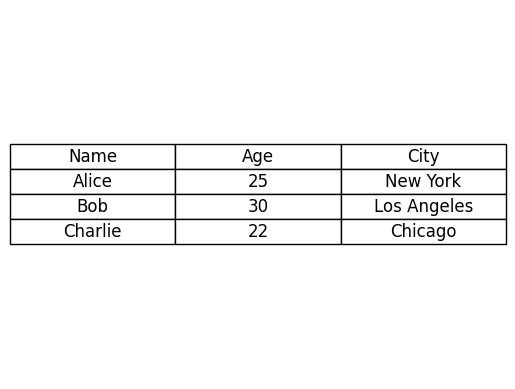

In [3]:
import matplotlib.pyplot as plt

# Sample data for the table
data = [
    ['Name', 'Age', 'City'],
    ['Alice', 25, 'New York'],
    ['Bob', 30, 'Los Angeles'],
    ['Charlie', 22, 'Chicago'],
]

# Create a figure and axis
fig, ax = plt.subplots()

# Create the table and add it to the axis
table = ax.table(cellText=data, loc='center', cellLoc='center')

# Style the table (optional)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust the table size

# Hide axis labels and ticks (optional)
ax.axis('off')

# Display the plot
plt.show()


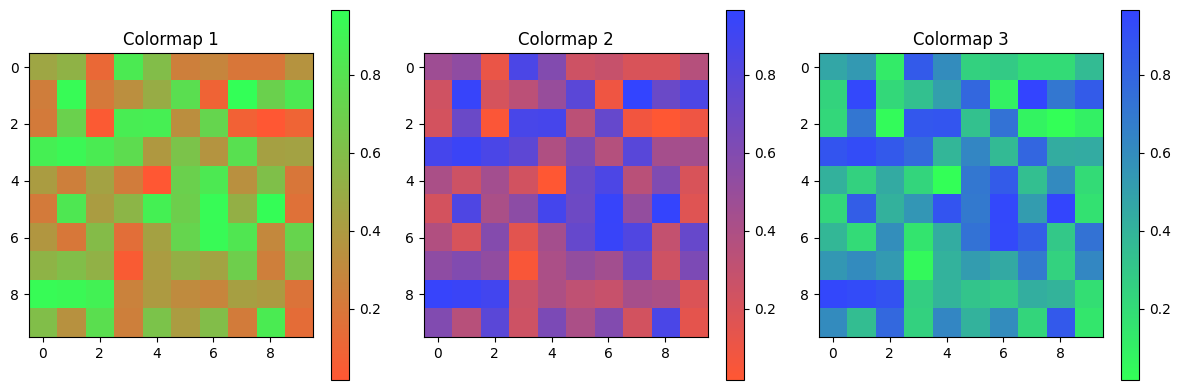

In [4]:
import matplotlib.colors as mcolors

# Define the color pairs
color_pairs = [('#FF5733', '#33FF57'), ('#FF5733', '#3344FF'), ('#33FF57', '#3344FF')]

# Create colormaps
colormaps = []
for color1, color2 in color_pairs:
    cmap_name = f'custom_{color1}_{color2}'
    cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, [color1, color2], N=256)
    colormaps.append(cmap)

# Example: Using the colormaps
import matplotlib.pyplot as plt
import numpy as np

# Create a sample data array
data = np.random.rand(10, 10)

# Plot using the custom colormaps
plt.figure(figsize=(12, 4))
for i, cmap in enumerate(colormaps, 1):
    plt.subplot(1, len(colormaps), i)
    plt.imshow(data, cmap=cmap)
    plt.colorbar()
    plt.title(f'Colormap {i}')

plt.tight_layout()
plt.show()


In [3]:
data = {
    'Height (inches)': [65, 70, 68, 72, 63],
    'Weight (lbs)': [150, 180, 160, 200, 140]
}

df = pd.DataFrame(data)

In [4]:
df

,Height (inches),Weight (lbs)
0,65,150
1,70,180
2,68,160
3,72,200
4,63,140


In [5]:
df.values

array([[ 65, 150],
       [ 70, 180],
       [ 68, 160],
       [ 72, 200],
       [ 63, 140]], dtype=int64)